In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#Data Loading
RawData = pd.read_csv("https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv")

In [3]:
#Data Exploration
RawData.shape

(212331, 15)

In [4]:
RawData.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [5]:
RawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

In [6]:
#droping duplicate entries from data
RawData = RawData.drop_duplicates()
RawData.shape

(188512, 15)

## Question - How many students where tested in Algebra Skills from Central Part East High Scool compared to other High schools in Manhattan and the state?

In [7]:
#Dropping unnecessary columns
RawData.drop('Mean Score', axis=1, inplace = True)
RawData.drop('Number Scoring Below 65', axis=1, inplace = True)
RawData.drop('Percent Scoring Below 65', axis=1, inplace = True)
RawData.drop('Number Scoring 65 or Above', axis=1, inplace = True)
RawData.drop('Percent Scoring 65 or Above', axis=1, inplace = True)
RawData.drop('Number Scoring 80 or Above', axis=1, inplace = True)
RawData.drop('Percent Scoring 80 or Above', axis=1, inplace = True)
RawData.drop('Number Scoring CR', axis=1, inplace = True)
RawData.drop('Percent Scoring CR', axis=1, inplace = True)
RawData.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2


In [8]:
#Droping any entries with missing values in Reagents Exam
RawData = RawData.dropna()
RawData.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2


#### Central Park East High School Dataframe

In [9]:
#List of Entries for Central Park East High School
CentralParkEast1 = RawData[RawData['School Name'] == 'Central Park East High School']
CentralParkEast1.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested
3075,04M555,Central Park East High School,High school,Algebra2/Trigonometry,2015,108
3076,04M555,Central Park East High School,High school,Algebra2/Trigonometry,2016,131
3077,04M555,Central Park East High School,High school,Common Core Algebra,2015,94
3078,04M555,Central Park East High School,High school,Common Core Algebra,2016,95
3079,04M555,Central Park East High School,High school,Common Core Algebra,2017,120


In [10]:
#Filtering out any etries not for Algebra
CentralParkEast = CentralParkEast1[CentralParkEast1['Regents Exam'].str.contains('Algebra')]
CentralParkEast.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested
3075,04M555,Central Park East High School,High school,Algebra2/Trigonometry,2015,108
3076,04M555,Central Park East High School,High school,Algebra2/Trigonometry,2016,131
3077,04M555,Central Park East High School,High school,Common Core Algebra,2015,94
3078,04M555,Central Park East High School,High school,Common Core Algebra,2016,95
3079,04M555,Central Park East High School,High school,Common Core Algebra,2017,120


<AxesSubplot:xlabel='Total Tested', ylabel='Regents Exam'>

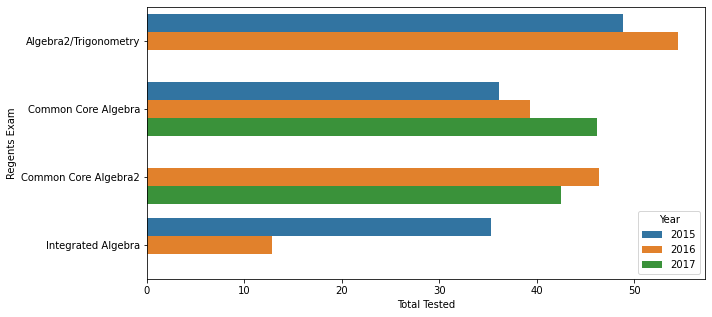

In [11]:
#Chart of the number tested per year for Algebra out of Central Park East High School 
plt.figure(figsize=[10,5])
sns.barplot(x='Total Tested',y='Regents Exam', hue="Year", data=CentralParkEast, orient='h', ci=None)

#### Manhattan High Schools Dataframe

In [12]:
#List of Entries for Schools in Manhattan
Manhattan1 = RawData[RawData['School DBN'].str.contains('M')]
Manhattan1.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2


In [14]:
#Dropping any entries not listed as a High School only level
Manhattan2 = Manhattan1[Manhattan1['School Level'].str.contains('High ')]
Manhattan2.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested
18,01M292,Orchard Collegiate Academy,High school,Algebra2/Trigonometry,2015,5
19,01M292,Orchard Collegiate Academy,High school,Algebra2/Trigonometry,2016,5
20,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2015,12
21,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2016,50
22,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2017,53


In [15]:
#Check to make sure only High School level Schools are in dataframe
Manhattan2.groupby(['School Level'])['Total Tested'].sum()

School Level
High school    1576701
Name: Total Tested, dtype: int64

In [16]:
#Filtering out any etries not for Algebra
Manhattan = Manhattan2[Manhattan2['Regents Exam'].str.contains('Algebra')]
Manhattan.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested
18,01M292,Orchard Collegiate Academy,High school,Algebra2/Trigonometry,2015,5
19,01M292,Orchard Collegiate Academy,High school,Algebra2/Trigonometry,2016,5
20,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2015,12
21,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2016,50
22,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2017,53


<AxesSubplot:xlabel='Total Tested', ylabel='Regents Exam'>

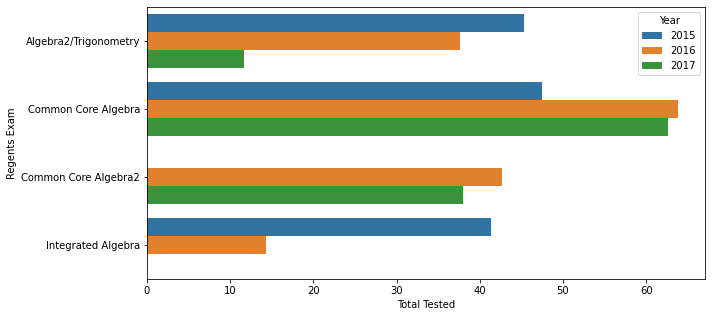

In [17]:
#Chart of the number tested per year for algebra out of High Schools in Manhattan 
plt.figure(figsize=[10,5])
sns.barplot(x='Total Tested',y='Regents Exam', hue="Year", data=Manhattan, orient='h', ci=None)

#### State High Schools Dataframe

In [19]:
#List of Entries for Schools in the state
State = RawData[RawData['Regents Exam'].str.contains('Algebra')]
State.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51


<AxesSubplot:xlabel='Total Tested', ylabel='Regents Exam'>

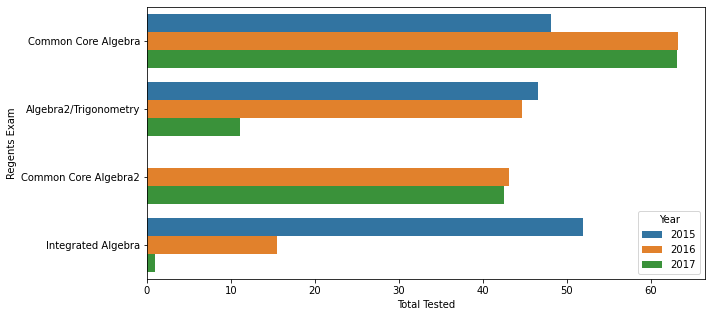

In [31]:
#Chart of the number tested for algebra per year out of High Schools in the state
plt.figure(figsize=[10,5])
sns.barplot(x='Total Tested',y='Regents Exam', hue="Year", data=State, orient='h', ci=None)

### Data Summary

Text(0.5, 1.0, 'Number of Central Park East HigStudents')

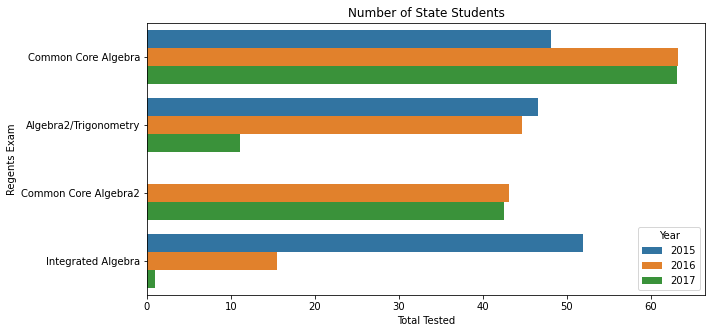

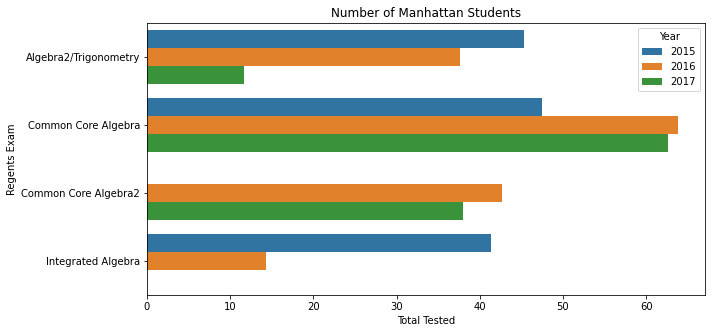

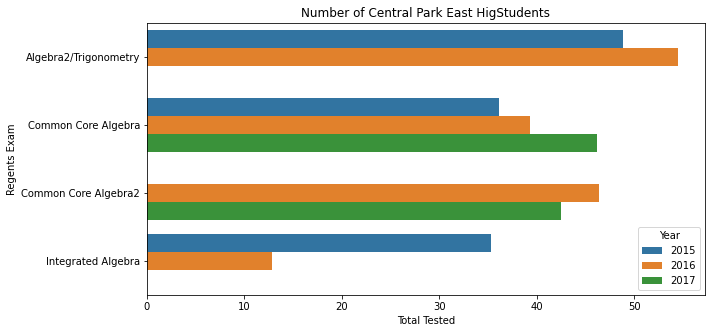

In [32]:
#Putting all charts together for comparison
plt.figure(figsize=[10,5])
sns.barplot(x='Total Tested',y='Regents Exam', hue="Year", data=State, orient='h', ci=None).set_title("Number of State Students")
plt.figure(figsize=[10,5])
sns.barplot(x='Total Tested',y='Regents Exam', hue="Year", data=Manhattan, orient='h', ci=None).set_title("Number of Manhattan Students")
plt.figure(figsize=[10,5])
sns.barplot(x='Total Tested',y='Regents Exam', hue="Year", data=CentralParkEast, orient='h', ci=None).set_title("Number of Central Park East HigStudents")

# Conculsion - Central Part East High School was in line with the number of students tested in Algebra skills with the exception for the Algebra2/Trigonometry Exams did show that they tested more students 2015.